## Fraud Detection using Classification models

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')
sns.set(style='whitegrid')

In [4]:
df=pd.read_csv('D:\ML-Fraud-Detection\datasets\AIML Dataset.csv')

In [4]:
df.head()

step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [8]:
df.shape

(6362620, 11)

In [14]:
df['isFraud'].value_counts()
# highly Imbalanced Datasets
print((8213/6354407)*100)

0.129248881917699


In [10]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [11]:
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [12]:
df.duplicated().sum()

np.int64(0)

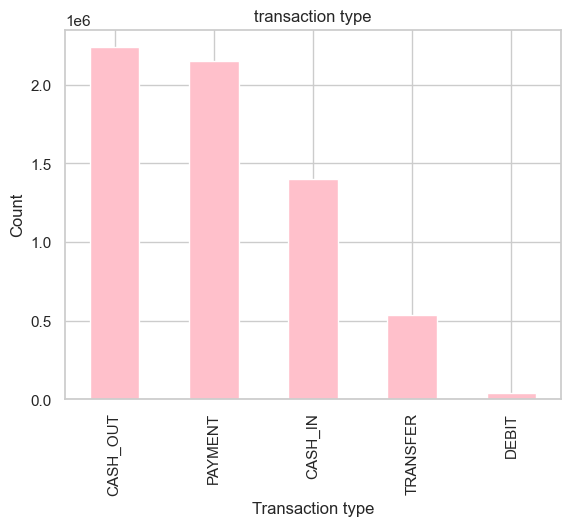

In [15]:
df['type'].value_counts().plot(kind='bar',title='transaction type',color='pink')
plt.xlabel('Transaction type')
plt.ylabel('Count')
plt.show()

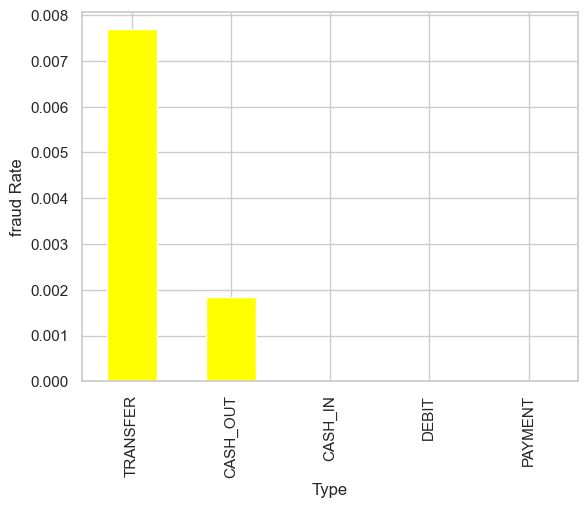

In [18]:
fraud_by_type=df.groupby('type')['isFraud'].mean().sort_values(ascending=False)
fraud_by_type.plot(kind='bar',color='yellow')
plt.xlabel('Type')
plt.ylabel('fraud Rate')
plt.show()

In [19]:
fraud_by_type

type
TRANSFER    0.007688
CASH_OUT    0.001840
CASH_IN     0.000000
DEBIT       0.000000
PAYMENT     0.000000
Name: isFraud, dtype: float64

In [20]:
df['amount'].describe()

count    6.362620e+06
mean     1.798619e+05
std      6.038582e+05
min      0.000000e+00
25%      1.338957e+04
50%      7.487194e+04
75%      2.087215e+05
max      9.244552e+07
Name: amount, dtype: float64

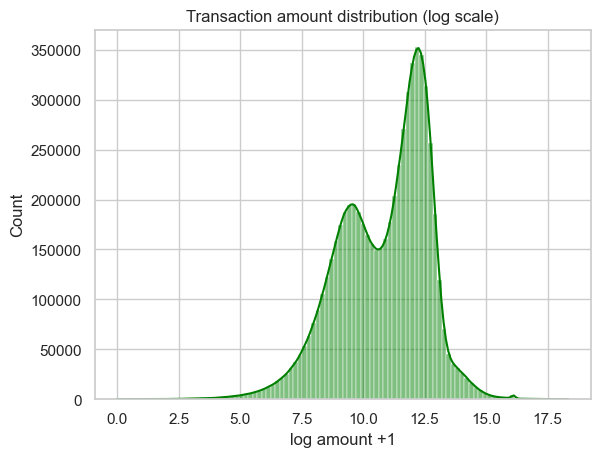

In [22]:
sns.histplot(np.log1p(df['amount']),bins=100,kde=True,color='green')
plt.title('Transaction amount distribution (log scale)')
plt.xlabel('log amount +1')
plt.show()

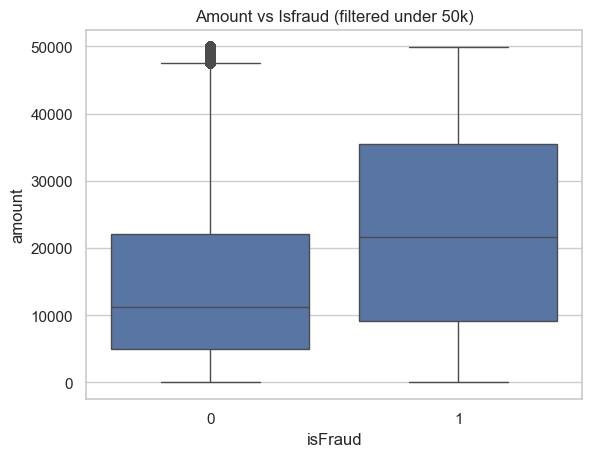

In [26]:
sns.boxplot(data=df[df['amount']<50000],x='isFraud',y='amount')
plt.title('Amount vs Isfraud (filtered under 50k)')
plt.show()

In [13]:
df['balanceDiffOrig']=df['oldbalanceOrg']-df['newbalanceOrig']

In [14]:
df['balanceDiffDest']=df['newbalanceDest']-df['oldbalanceDest']

In [15]:
(df['balanceDiffOrig']<0).sum()

np.int64(1399253)

In [16]:
(df['balanceDiffDest']<0).sum()

np.int64(1238864)

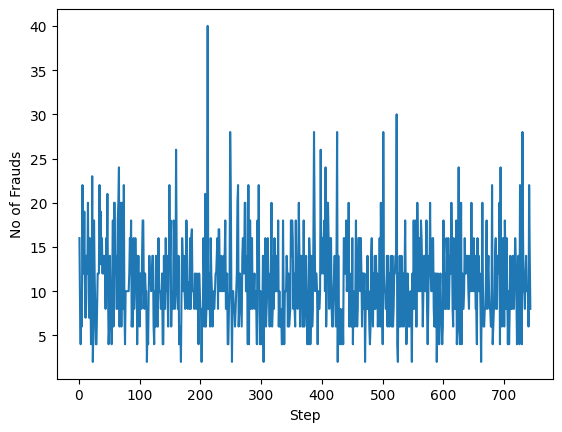

In [22]:
frauds_by_step=df[df['isFraud']==1]['step'
].value_counts().sort_index()
plt.plot(frauds_by_step.index,frauds_by_step.values,label='Frauds per Step')
plt.xlabel('Step')
plt.ylabel('No of Frauds')
plt.show()

In [23]:
df.drop(columns='step',inplace=True)

In [24]:
top_senders = df['nameOrig'].value_counts().head(10)

In [25]:
top_receivers=df['nameDest'].value_counts().head(10)

In [26]:
fraud_users=df[df['isFraud']==1]['nameOrig'].value_counts().head(10)

In [27]:
fraud_types=df[df['type'].isin(['TRANSFER','CASH_OUT'])]

In [28]:
fraud_types['type'].value_counts()

type
CASH_OUT    2237500
TRANSFER     532909
Name: count, dtype: int64

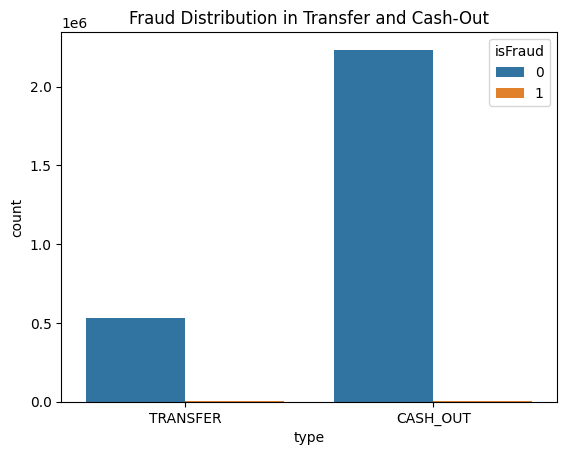

In [29]:
sns.countplot(data=fraud_types,x='type',hue='isFraud')
plt.title('Fraud Distribution in Transfer and Cash-Out')
plt.show()

In [33]:
corr_am =df[['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','isFraud']].corr()

In [34]:
corr_am

amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
amount          1.000000      -0.002762       -0.007861        0.294137   
oldbalanceOrg  -0.002762       1.000000        0.998803        0.066243   
newbalanceOrig -0.007861       0.998803        1.000000        0.067812   
oldbalanceDest  0.294137       0.066243        0.067812        1.000000   
newbalanceDest  0.459304       0.042029        0.041837        0.976569   
isFraud         0.076688       0.010154       -0.008148       -0.005885   

                newbalanceDest   isFraud  
amount                0.459304  0.076688  
oldbalanceOrg         0.042029  0.010154  
newbalanceOrig        0.041837 -0.008148  
oldbalanceDest        0.976569 -0.005885  
newbalanceDest        1.000000  0.000535  
isFraud               0.000535  1.000000

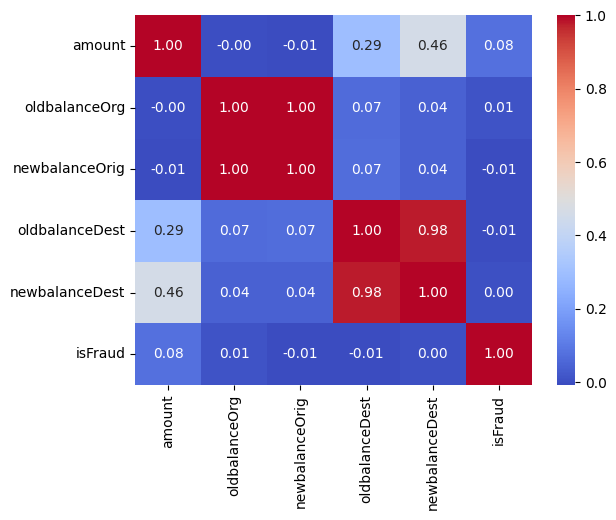

In [36]:
sns.heatmap(corr_am,annot=True,cmap='coolwarm',fmt='.2f')
plt.show()

In [38]:
zero_after_transfer=df[
    (df['oldbalanceOrg']>0)&
    (df['newbalanceOrig']==0)&
    (df['type'].isin(['TRANSFER','CASH_OUT']))
]

In [39]:
len(zero_after_transfer)

1188074

In [40]:
## Feature Selection

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.metrics import classification_report,roc_auc_score,roc_curve,confusion_matrix
from sklearn.pipeline import Pipeline

In [7]:
df_model=df.drop(['nameOrig','nameDest','isFlaggedFraud'],axis=1)

In [8]:
df_model.head()

step      type    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0     1   PAYMENT   9839.64       170136.0       160296.36             0.0   
1     1   PAYMENT   1864.28        21249.0        19384.72             0.0   
2     1  TRANSFER    181.00          181.0            0.00             0.0   
3     1  CASH_OUT    181.00          181.0            0.00         21182.0   
4     1   PAYMENT  11668.14        41554.0        29885.86             0.0   

   newbalanceDest  isFraud  
0             0.0        0  
1             0.0        0  
2             0.0        1  
3             0.0        1  
4             0.0        0

In [9]:
df_model.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [10]:
categorical=['type']
numeric=['amount','oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest']

In [11]:
y=df_model['isFraud']
X=df_model.drop(['isFraud'],axis=1)

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [13]:
preprocessor=ColumnTransformer(
    transformers=[
        ('num',StandardScaler(),numeric),
        ('cat',OneHotEncoder(drop='first'),categorical)
    ],
    remainder='drop'
)

In [14]:
pipeline=Pipeline(
    [('prep',preprocessor),
     ('clf',LogisticRegression(class_weight='balanced',max_iter=1000))# Class Imbalance handling
     ]
)

In [15]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['amount', 'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['type'])])),
                ('clf',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

In [73]:
y_pred=pipeline.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97   1906345
           1       0.02      0.94      0.04      2441

    accuracy                           0.95   1908786
   macro avg       0.51      0.94      0.51   1908786
weighted avg       1.00      0.95      0.97   1908786



In [74]:
# Model does not have precision and f1-score

In [75]:
pipeline.score(X_test,y_test)

0.9473345885814335

## SMOTE Upsampling
- Take difference between a sample and its nearest neighbour
- Multiply the difference by a random number between 0 and 1
- Add this difference to the sample to generate a new synthetic example in feature space
- Continue on with next nearest neighbour up to user-defined number

## PseudoCode for Smote
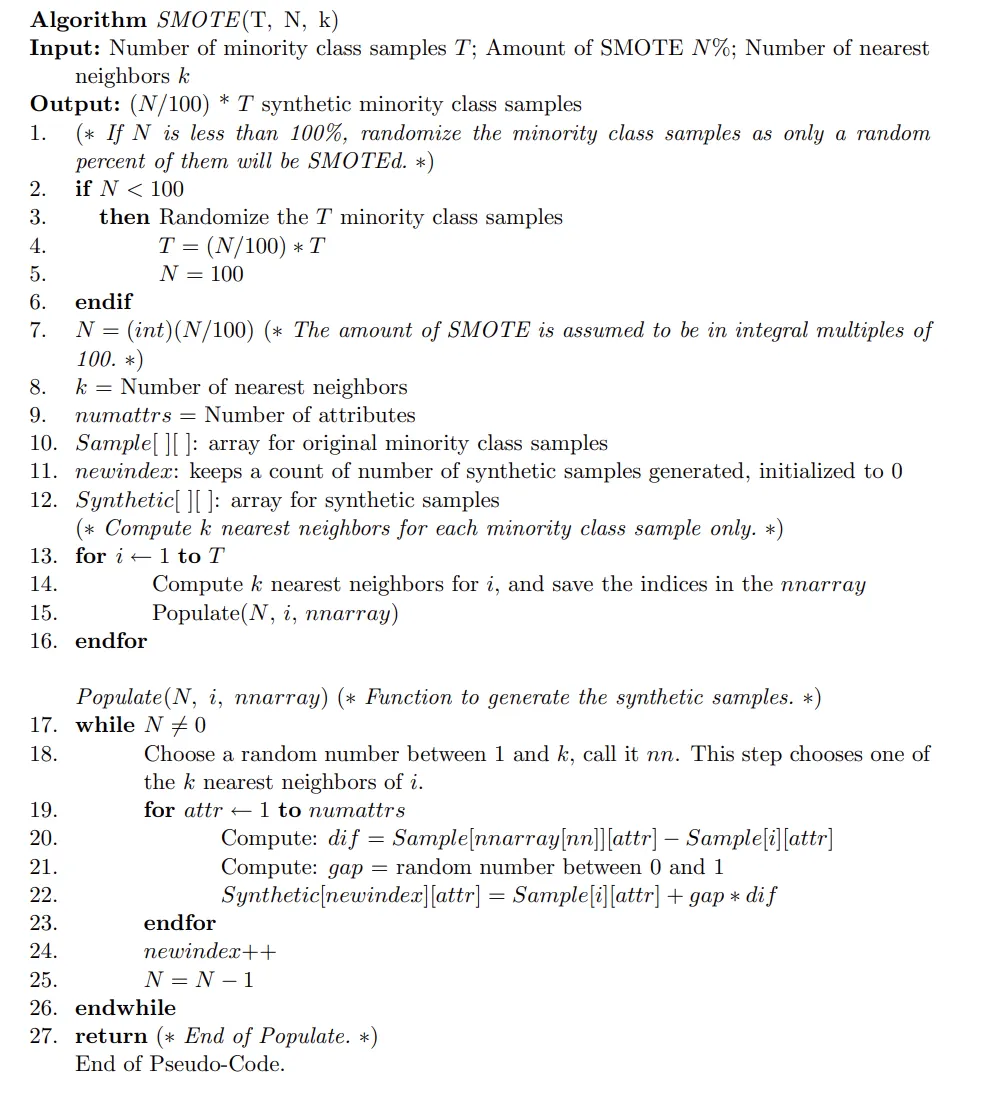

In [16]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42, k_neighbors=5)

In [17]:
X1=df[['amount','oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest','type']]
#excluding type
y1=df['isFraud']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X1,y1, test_size=0.2, random_state=42)

In [33]:
preprocessor=ColumnTransformer(
    transformers=[
        ('num',StandardScaler(),numeric),
        ('cat',OneHotEncoder(),categorical)
    ],
)

In [34]:
X_train_scaled=preprocessor.fit_transform(X_train)
X_test_scaled=preprocessor.transform(X_test)

In [35]:
X_res, y_res = sm.fit_resample(X_train_scaled,y_train)
X_test_res,y_test_res=sm.fit_resample(X_test_scaled,y_test)

In [52]:
log=LogisticRegression(n_jobs=-1,random_state=42)
log.fit(X_res,y_res)

LogisticRegression(n_jobs=-1, random_state=42)

In [53]:
y_pred_log=log.predict(X_test_res)
print(classification_report(y_test_res,y_pred_log))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95   1270904
           1       0.95      0.96      0.95   1270904

    accuracy                           0.95   2541808
   macro avg       0.95      0.95      0.95   2541808
weighted avg       0.95      0.95      0.95   2541808



In [30]:
### Model is stable
## Precision recall F1score of 95

In [66]:
import joblib 
joblib.dump(log,'fraud_detection.pkl', compress=3)

['fraud_detection.pkl']

In [60]:
X_train.columns

Index(['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'type'],
      dtype='object')

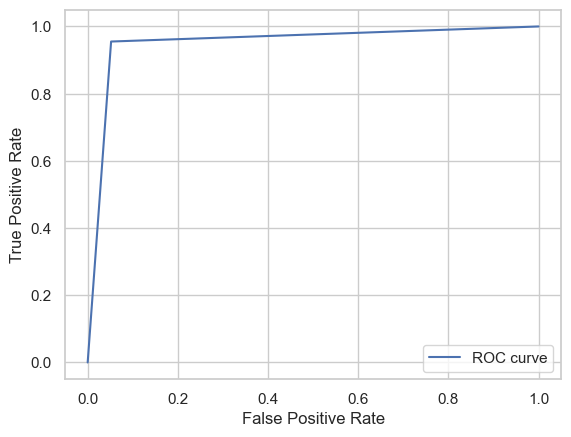

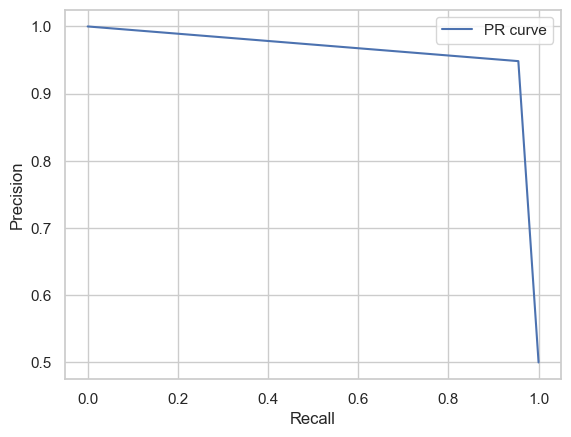

In [62]:
from sklearn.metrics import roc_curve, precision_recall_curve
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_test_res, y_pred_log)
plt.plot(fpr, tpr, label="ROC curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

precision, recall, _ = precision_recall_curve(y_test_res, y_pred_log)
plt.plot(recall, precision, label="PR curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()


In [65]:
from sklearn.metrics import classification_report, roc_auc_score

# Training metrics
y_train_pred = log.predict(X_res)
y_train_proba = log.predict_proba(X_res)[:,1]

print("=== Training Performance ===")
print(classification_report(y_res, y_train_pred))
print("ROC-AUC (train):", roc_auc_score(y_res, y_train_proba))

# Test metrics
y_test_pred = log.predict(X_test_res)
y_test_proba = log.predict_proba(X_test_res)[:,1]

print("\n=== Test Performance ===")
print(classification_report(y_test_res, y_test_pred))
print("ROC-AUC (test):", roc_auc_score(y_test_res, y_test_proba))


=== Training Performance ===
              precision    recall  f1-score   support

           0       0.96      0.95      0.95   5083503
           1       0.95      0.96      0.95   5083503

    accuracy                           0.95  10167006
   macro avg       0.95      0.95      0.95  10167006
weighted avg       0.95      0.95      0.95  10167006

ROC-AUC (train): 0.9910476394101085

=== Test Performance ===
              precision    recall  f1-score   support

           0       0.95      0.95      0.95   1270904
           1       0.95      0.96      0.95   1270904

    accuracy                           0.95   2541808
   macro avg       0.95      0.95      0.95   2541808
weighted avg       0.95      0.95      0.95   2541808

ROC-AUC (test): 0.9916290002945616
